# Tarea semanal 5
## Nicolás Albano 

La tarea de esta semana se basa en la resolucion de las siguientes consignas: 


Diseñar un filtro pasabajos normalizado Bessel  para obtener un Retardo de Grupo  D(w) de 1 segundo.

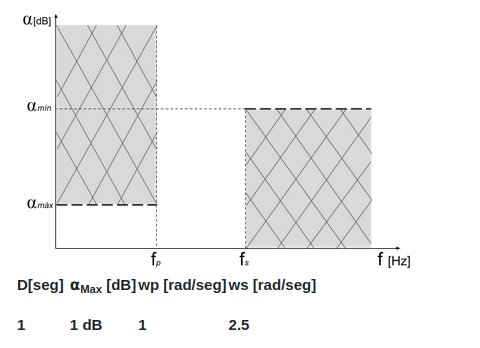


1. Utilizando el metodo de Storch ( pag. 403 del Schaumann) obtener la T(s) Bessel para N: 2, 3 y 4 normalizados para D = 1  

2. Elegir la T(s) con el minimo orden que cumple con ⍺Max = 1 dB 

3. Evaluar el Retardo de Grupo  D(2.5). Expresar en forma porcentual [%] el error o desviamiento respecto a D(0)

4. Sintetizar el circuito NORMALIZADO con estructuras Sallen-Key con K=1 ( real. negativa unitaria )  


### Punto 1 

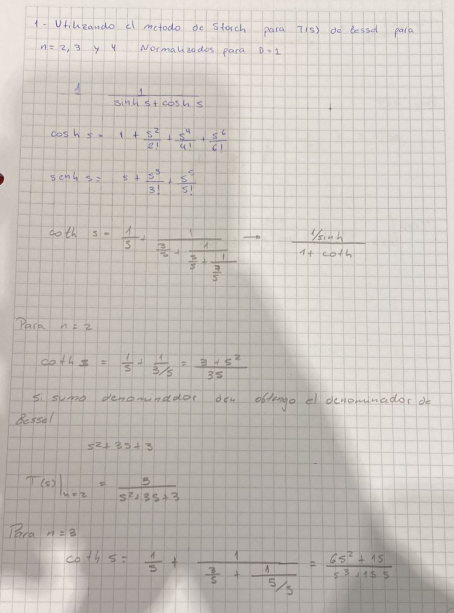
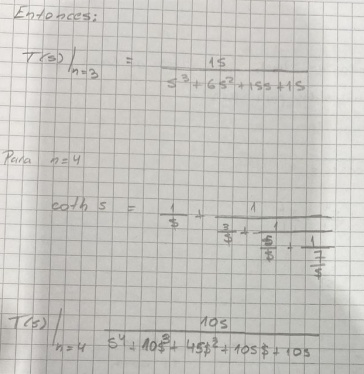

### Punto 2 

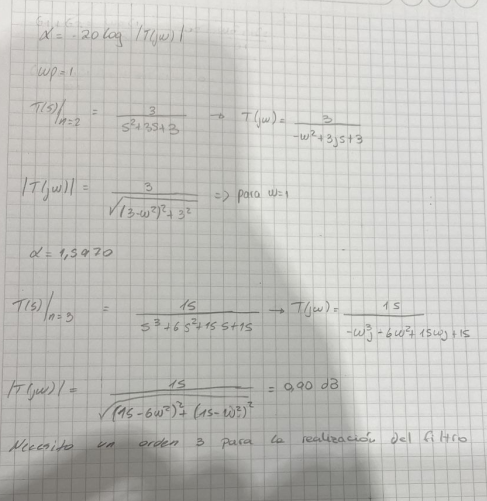


### Punto 3 


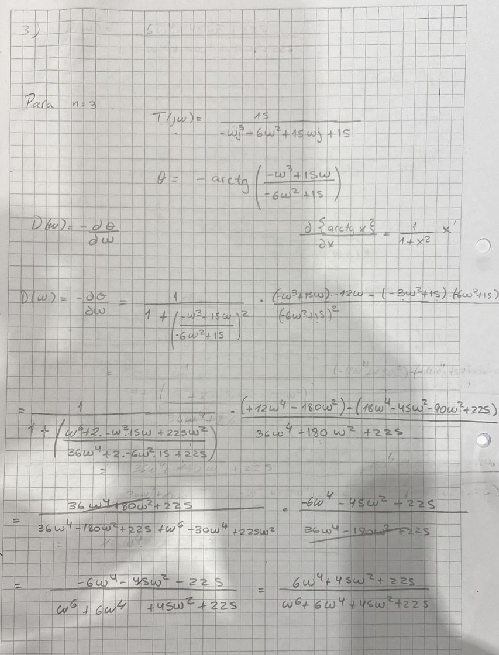

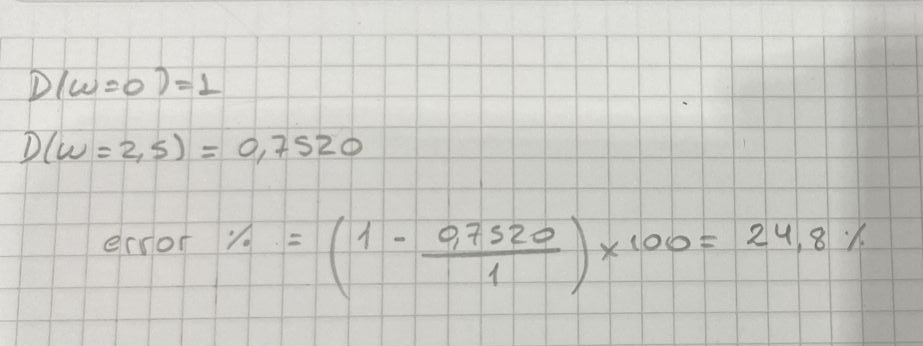


### Punto 4 

Resolucion del circuito:


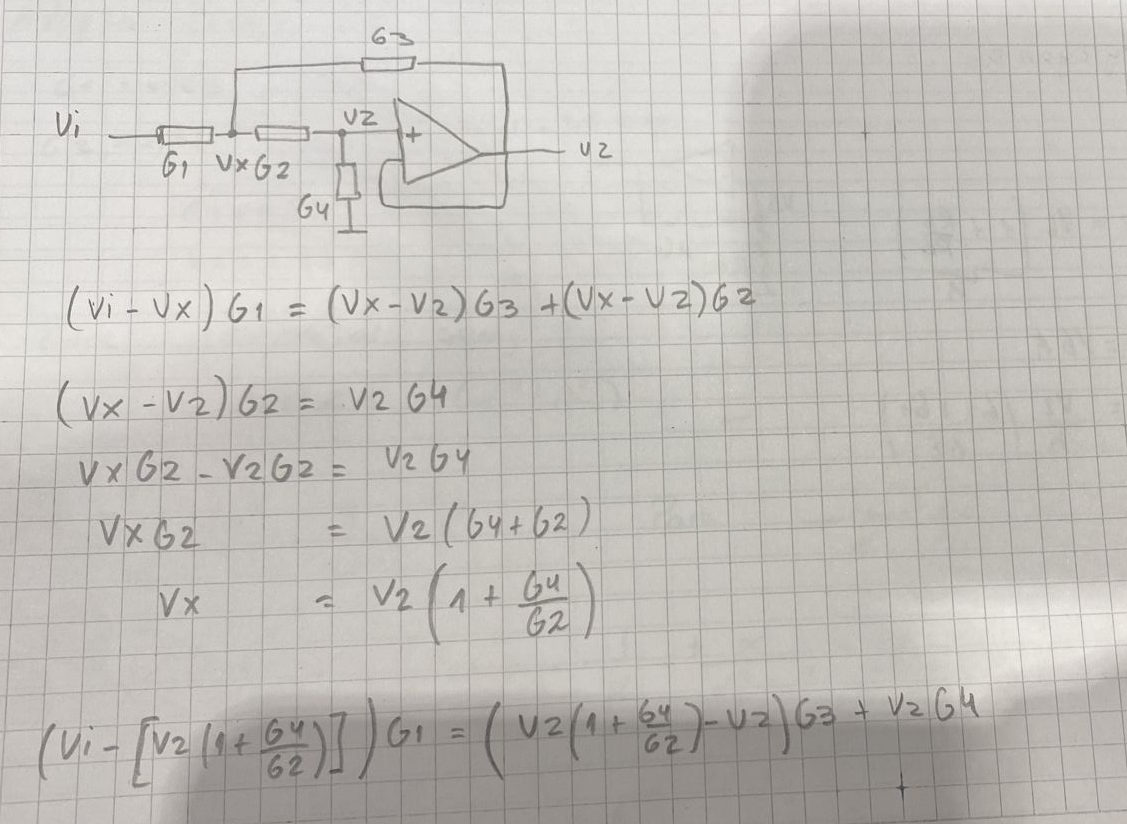

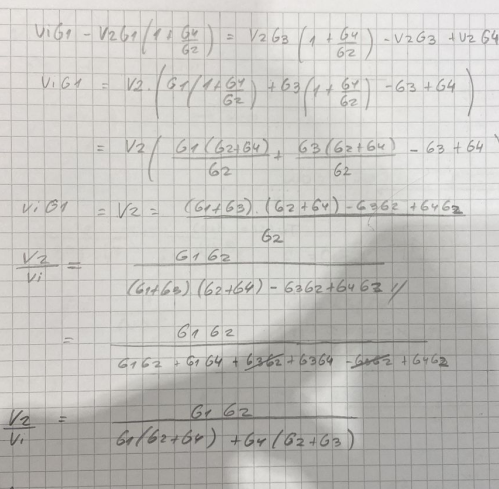


Sintesis del circuito: 

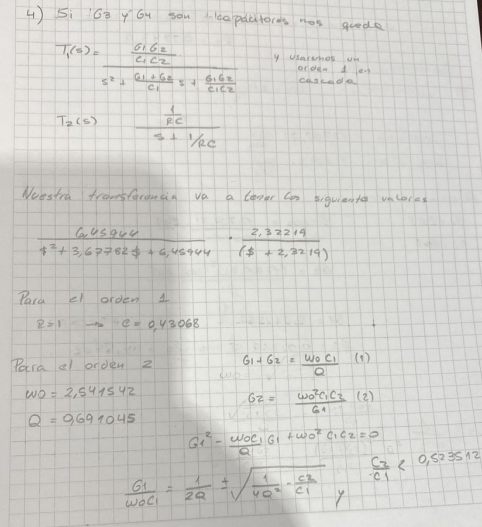

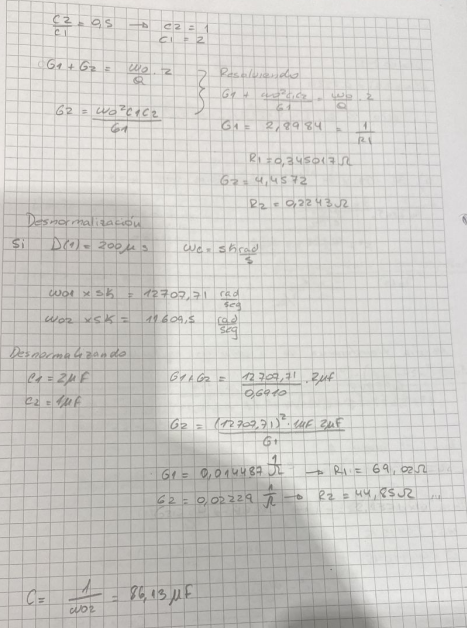




Simulacion circuital en Ltspice: 

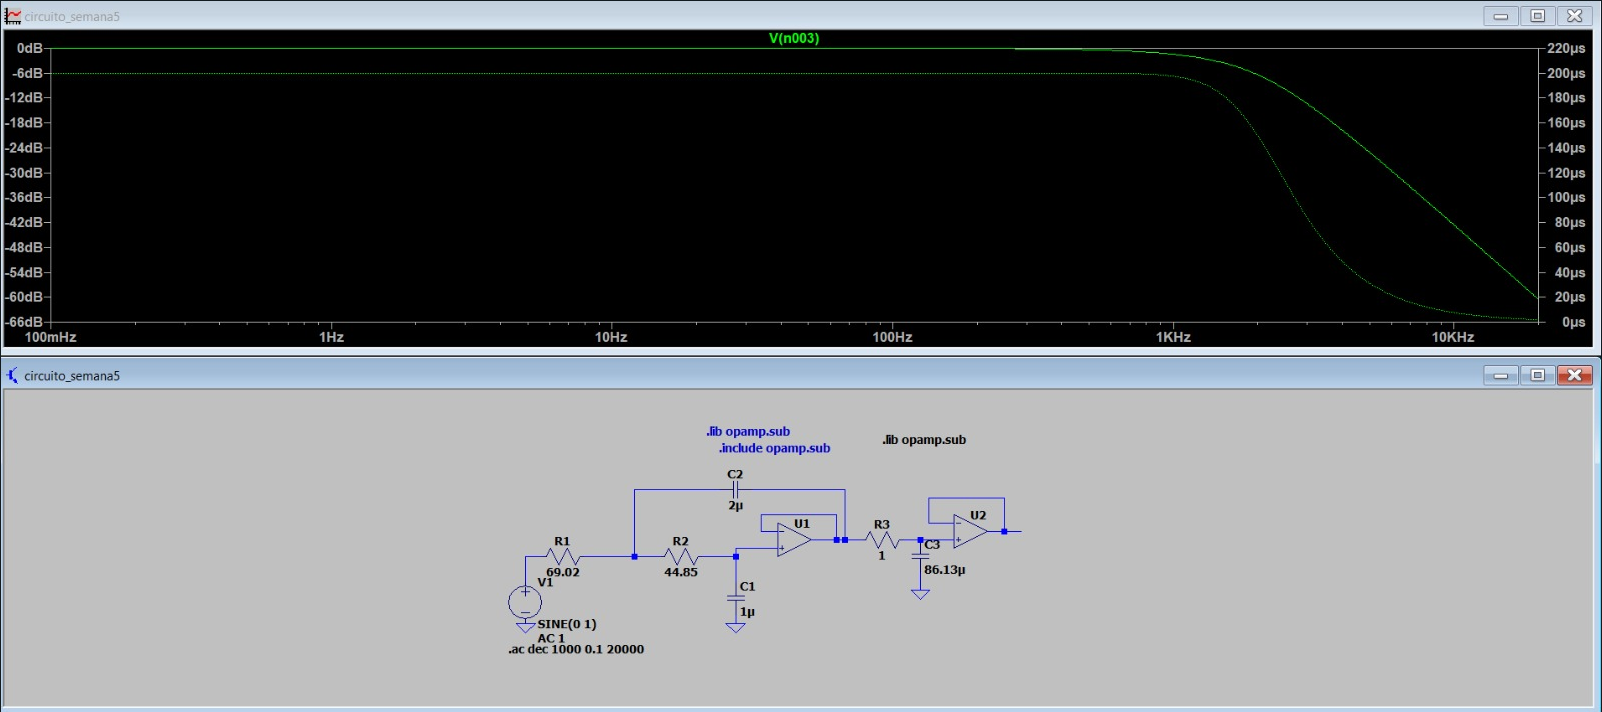


Simulacion en Python: 

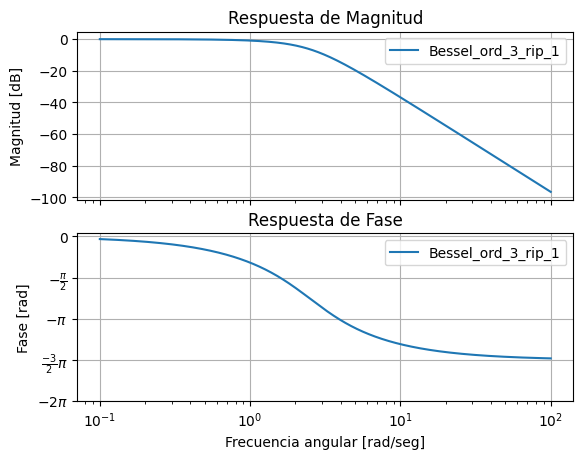

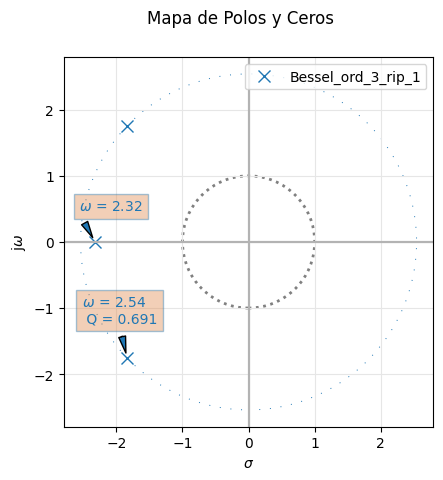

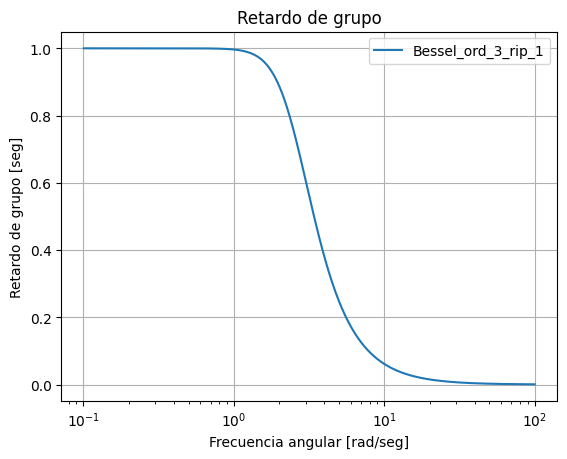

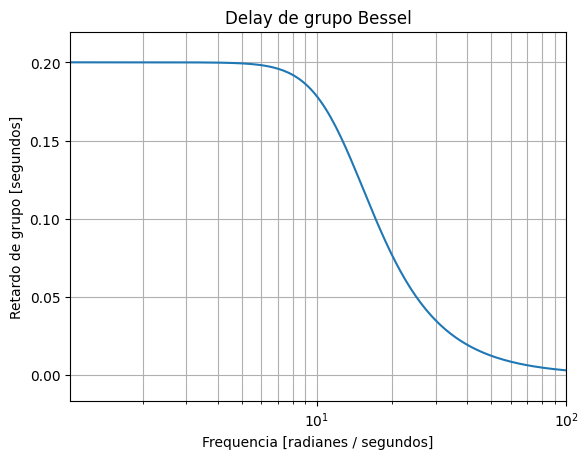

In [22]:

import numpy as np
from scipy.signal import besselap,bessel,freqz,zpk2tf,freqs,TransferFunction
from pytc2.sistemas_lineales import analyze_sys
import matplotlib as mpl
from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import analyze_sys

# Especificaciones del filtro
d=200e-3
fs = 1 / (2 * D)  # Frecuencia de muestreo
fc = 0.1 * fs  # Frecuencia de corte

# Orden del filtro
Norma=1/d
n=3
alfha_max=1

filter_names = []
all_sys=[]

# Me lo da normalizado con el D=200 microseg

b, a = bessel(n, Norma, 'low', analog=True, norm='delay')

z,p,k=besselap(n,norm='delay')

num_b,den_b=zpk2tf(z,p,k)

all_sys.append(TransferFunction(num_b,den_b))
this_aprox= 'Bessel'
this_label=this_aprox + '_ord_' + str(n) + '_rip_' + str(alfha_max) 

filter_names.append(this_label)
analyze_sys(all_sys,filter_names)

w, h = freqs(b, a)

plt.figure()

plt.semilogx(w[1:], -np.diff(np.unwrap(np.angle(h)))/np.diff(w))


plt.title('Delay de grupo Bessel')

plt.xlabel('Frequencia [radianes / segundos]')

plt.ylabel('Retardo de grupo [segundos]')

plt.margins(0, 0.1)

plt.grid(which='both', axis='both')

plt.show()
